# Aufgabenblatt 5

<p style="background-color:#f6f6f6;border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    In dieser Übung beschäftigen wir uns mit der Korrelation zwischen mehrerer Signale, beziehungsweise eines Signales mit sich selber. Dies erlaubt uns Informationen über den Daten geneirerenden Prozess zu bestimmen.
</p>

<p style="background-color:#f6f6f6;border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Ab dieser Übung werden der Umfang der Funktionstipps schrittweise gekürzt. Zuerst werden ab dieser Übung die Argumente nicht mehr angegeben (Verwenden sie die Dokumentation um diese zu bestimmen.:</strong><br/>
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Im allgemeinen haben die Funktionen weitere Argumente die übergeben werden können. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente darlegt und ihre Funktion beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.cov.html">numpy.cov(...)</a> Berechnet die Kovarianzmatrix der übergebenen Daten. <br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html">numpy.corrcoef(...)</a> Berechnet die Korrelation zwischen den Spalten des übergebenen Arrays.<br>
    <b>Funktionen zum Plotten: </b><br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html">axis.scatter(...)</a> Plotte die Datenpunkte in den Arrays x,y. Die Daten werden als Streudiagramm dargestellt.<br>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\CAMEO\Cameo4_R2\HOTFIX~1\Development\Libraries\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\CAMEO\Cameo4_R2\HOTFIX~1\Development\Libraries\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\CAMEO\Cameo4_R2\HOTFIX~1\Development\Libraries\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Kovarianz und Korrelationskoeffizient

In dieser Übung berechnen Sie die Kovarianz und den Korrelationskoeffizienten zwischen verschiedenen Messgrössen eines Datensatzes.

## a)

Laden Sie den Datensatz "data_xyz.txt". Er enthält drei Auslenkungen x, y und z, abhängig von der Zeit t gemessen. Erstellen Sie Plots der Messgrössen als Funktion der Zeit.

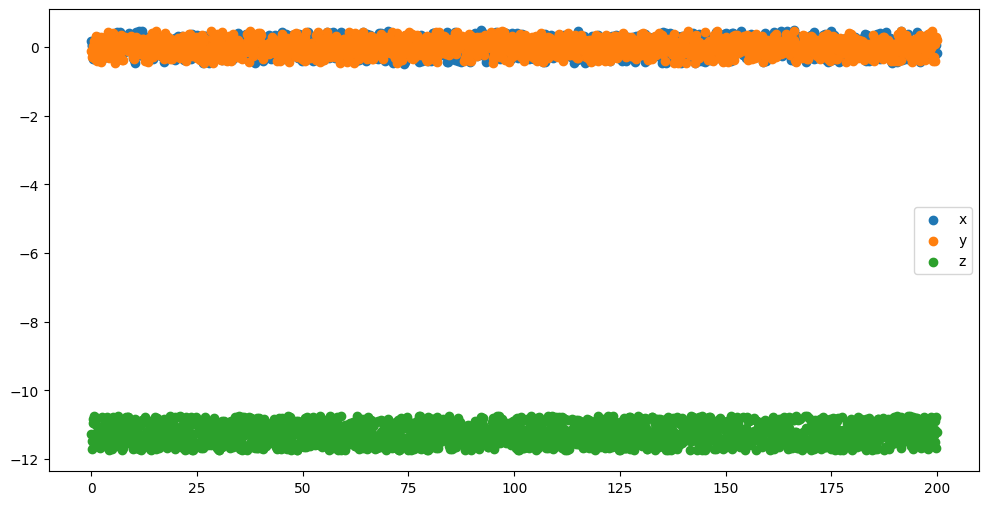

In [21]:
data=np.loadtxt('data_xyz.txt')
t=data[:,0]
x=data[:,1]
y=data[:,2]
z=data[:,3]
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(t, x, label='x')
ax.scatter(t, y, label='y')
ax.scatter(t, z, label='z')
ax.legend()

## b)

Plotten Sie nun die Messgrössen paarweise in Abhängigkeit voneinander, also z.B. y(x), z(x) und y(z). Was sehen Sie für Abhängigkeiten?

Tipp: Verwenden Sie entweder die Funktion `ax.scatter` oder schalten Sie in `ax.plot` die Linien zwischen den Datenpunkten aus um einen Scatterplot zu erstellen.

Text(0, 0.5, 'z')

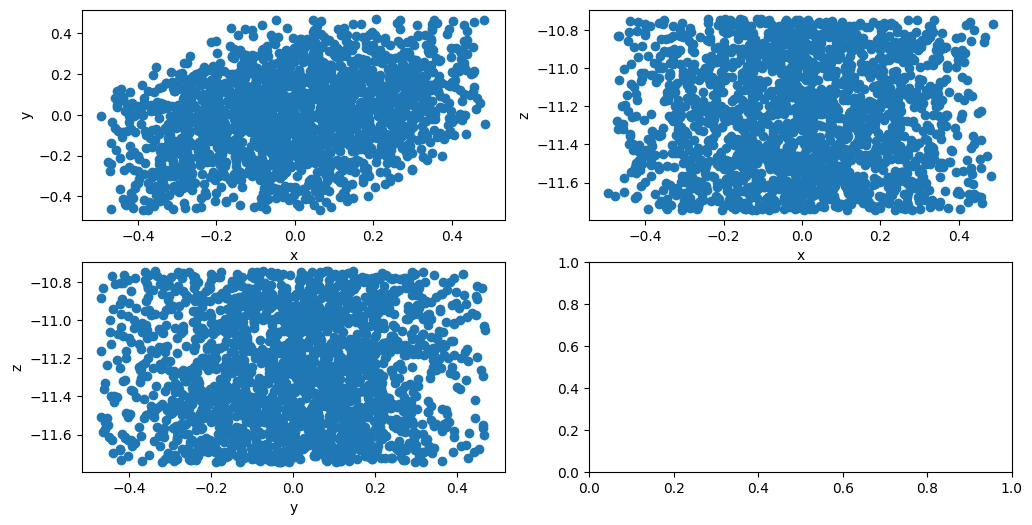

In [22]:
fig, axes = plt.subplots(figsize=(12, 6), nrows=2,ncols=2)
ax=axes[0,0]
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax=axes[0,1]
ax.scatter(x, z)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax=axes[1,0]
ax.scatter(y, z)
ax.set_xlabel('y')
ax.set_ylabel('z')

## c)

Schreiben Sie eine Funktion, die aus zwei gleich langen Arrays von Datenpunkten die Kovarianz berechnet.
Überprüfen Sie Ihr Resultat mithilfe von `np.cov`. Beachten Sie, dass diese Funktion die gesamte Kovarianzmatrix zurückgibt, also

$$ \mathrm{np.cov(x, y)} = \left( \begin{matrix} \sigma_{xx}^2 & \sigma_{xy}^2 \\
                                                 \sigma_{yx}^2 & \sigma_{yy}^2 \end{matrix} \right). $$

In [27]:
def my_cov(x,y):
    n=len(x)
    return np.dot(x-np.mean(x),y-np.mean(y))/(n-1)

def np_cov(x,y):
    return np.cov(x,y)[0,1]

print(my_cov(x,y), my_cov(x,z), my_cov(y,z))
print(np_cov(x,y), np_cov(x,z), np_cov(y,z))

0.014077229006954206 -0.0009407606781855026 0.0009118521186915488
0.014077229006954205 -0.0009407606781855019 0.0009118521186915482


## d)

Berechnen Sie aus den Kovarianzen die Korrelationskoeffizienten für die Kombinationen von x, y und z. Entspricht das Resultat Ihren Erwartungen aufgrund der Plots?

Sie können Ihr Resultat mithilfe von `np.corrcoef` überprüfen. Kleine Abweichungen können aufgrund von Rundungsfehlern und der genauen Implementation auftreten. Auch diese Funktion gibt gleich die ganze Korrelationsmatrix zurück.

In [34]:
for (a,b) in [(x,y),(x,z),(y,z)]:
    print('my corr coef', my_cov(a,b)/(np.std(a)*np.std(b)), '\nnp corr coef', np.corrcoef(a,b)[0,1])


my corr coef 0.32448993257349296 
np corr coef 0.3243276876072062
my corr coef -0.015387073765602145 
np corr coef -0.015379380228719337
my corr coef 0.015392098307353008 
np corr coef 0.015384402258199325


# Autokovarianz als Funktion der Zeit

In dieser Übung schauen Sie sich die Autokovarianz verschiedener Arten von Signalen an.

## a)

Laden Sie den Datensatz 'signal_1.txt' und plotten Sie die Daten.

## b)

Schreiben Sie eine Funktion, die die Autokovarianz 

$$R_{xx}(\Delta i) = \frac{1}{N - \Delta i} \sum_{i=0}^{N - \Delta i - 1} \left(x[i] - \bar{x}\right) \left(x[i + \Delta i] - \bar{x}\right)$$

eines Datenarrays $x$ mit $N$ Punkten berechnet, die in gleichmässigen Zeitabständen gemessen wurden. Die Funktion soll zwei Arguemente haben, das Datenarray $x$, und die Verschiebung $\Delta i$. Folgendes ist zu beachten:

- Die Verschiebung $\Delta i$ gibt hier an, um wie viele Stellen der Arrayindex verschoben wird. Die entsprechende zeitliche Verschiebung ist $\tau = t[\Delta i] - t[0]$, wenn $t$ das Array für die Zeitachse ist.
- Die Summe geht von 0 bis $N - \Delta i - 1$, damit der Arrayindex $i + \Delta i$ immer kleiner als $N$ ist.
- Im Nenner steht dementsprechend $N - \Delta i$, da dies die Anzahl Terme in der Summe ist.

## c)

Benutzen Sie Ihre Funktion um die Autokovarianz des Amplitudensignals aus den geladenen Daten für jedes $\Delta = 0, \dots, N-1$ zu berechnen. Berechnen Sie auch die entsprechenden Zeitverschiebungen $\tau$ und plotten sie $R_{xx}(\tau)$. Interpretieren Sie das Resultat.


## d)

Laden Sie nun den Datensatz 'signal_2.txt' und plotten Sie sowohl die Amplitude als Funktion der Zeit, als auch die Autokovarianz als Funktion von $\tau$. Interpretieren Sie wieder das Resultat.

## e)

Laden Sie nun den letzten Datensatz, 'signal_3.txt'. Dieser enthält zwei zeitabhängige Messungen, die mit der gleichen Zeitachse gemessen wurden. Plotten Sie beide Signale als Funktion der Zeit und zoomen Sie in der Zeitachse um die Struktur der Daten anzuschauen und sich den Unterschied zwischen den zwei Messungen bewusst zu machen.

## f)

Aus Ihren Plots sollten Sie für jede Messung eine typische Zeitskala $T_{\mathrm{sys}}$ ablesen können, die für das jeweilige System relevant ist. Da diese Messungen sehr viele Datenpunkte haben, kann die Ausführung des Codes sehr lange dauern, wenn Sie die Autokovarianz wie oben für alle möglichen $\tau$ bis $T_{\mathrm{max}}$ berechnen. Berechnen Sie deswegen die Autokovarianz beider Signale nur für $\tau \in [0, 2 T_{\mathrm{sys}}]$; der genaue Wert der oberen Grenze ist nicht so wichtig, nur dass er etwas grösser als die längere typische Zeitskala $T_{\mathrm{sys}}$ ist; dass Sie die obere Grenze hinreichend gross gewählt haben, erkennen Sie daran, dass die Autokovarianz für grosse $\tau$ gegen Null geht.

Vergleichen Sie die beiden Autokovarianzen und erklären Sie die Beziehung zu der Struktur, die Sie im zeitabhängigen Signal gesehen haben.

Tipp: Wenn die Fehlersuche mühsam ist, weil die Ausführung des Codes zu lange dauert, nehmen Sie erst mal nur die ersten 1000 Datenpunkte.